In [4]:
import pandas as pd
import numpy as np
# CELDA: Imputación de Valores Nulos
print("="*80)
print("🔧 IMPUTACIÓN DE VALORES NULOS")
print("="*80)

df_clean = pd.read_csv('PCOS_data_clean.csv')

# Verificar nulos
null_counts = df_clean.isnull().sum()
null_vars = null_counts[null_counts > 0]

print(f"\n📊 Valores nulos detectados:")
if len(null_vars) > 0:
    print(f"\n{'Variable':<35} {'Nulos':<10} {'% del total':<15}")
    print("-"*60)
    for var, count in null_vars.items():
        pct = (count / len(df_clean)) * 100
        print(f"{var:<35} {count:<10} {pct:<15.2f}%")
    
    print(f"\n💡 ESTRATEGIA DE IMPUTACIÓN:")
    
    # Imputar con mediana (más robusto que media)
    for var in null_vars.index:
        if df_clean[var].dtype in [np.float64, np.int64]:
            # Variables numéricas: mediana por grupo PCOS
            median_no_sop = df_clean[df_clean['PCOS (Y/N)'] == 0][var].median()
            median_sop = df_clean[df_clean['PCOS (Y/N)'] == 1][var].median()
            
            # Imputar según grupo
            mask_no_sop = (df_clean['PCOS (Y/N)'] == 0) & (df_clean[var].isnull())
            mask_sop = (df_clean['PCOS (Y/N)'] == 1) & (df_clean[var].isnull())
            
            df_clean.loc[mask_no_sop, var] = median_no_sop
            df_clean.loc[mask_sop, var] = median_sop
            
            print(f"   ✅ {var}: Mediana por grupo (No-SOP={median_no_sop:.2f}, SOP={median_sop:.2f})")
        else:
            # Variables categóricas: moda
            mode_val = df_clean[var].mode()[0]
            df_clean[var].fillna(mode_val, inplace=True)
            print(f"   ✅ {var}: Moda ({mode_val})")
    
    # Verificar
    remaining_nulls = df_clean.isnull().sum().sum()
    print(f"\n✅ Nulos restantes: {remaining_nulls}")
    
else:
    print("   ✅ No hay valores nulos en el dataset")

# Guardar
df_clean.to_csv('PCOS_data_imputed.csv', index=False)
print(f"\n💾 Guardado: PCOS_data_imputed.csv")

🔧 IMPUTACIÓN DE VALORES NULOS

📊 Valores nulos detectados:

Variable                            Nulos      % del total    
------------------------------------------------------------
Marraige Status (Yrs)               1          0.19           %
AMH(ng/mL)                          1          0.19           %
Fast food (Y/N)                     1          0.19           %

💡 ESTRATEGIA DE IMPUTACIÓN:
   ✅ Marraige Status (Yrs): Mediana por grupo (No-SOP=7.00, SOP=6.00)
   ✅ AMH(ng/mL): Mediana por grupo (No-SOP=3.20, SOP=5.83)
   ✅ Fast food (Y/N): Mediana por grupo (No-SOP=0.00, SOP=1.00)

✅ Nulos restantes: 0

💾 Guardado: PCOS_data_imputed.csv


🔄 WINSORIZACIÓN DE OUTLIERS MODERADOS

📊 Dataset cargado:
   Filas: 538
   Columnas: 42
   Nulos: 0

🔍 IDENTIFICANDO VARIABLES CON OUTLIERS EXTREMOS

📊 VARIABLES CON MÁS OUTLIERS:

Variable                       Outliers     % Outliers   Max Actual   P99         
------------------------------------------------------------------------------------------
II    beta-HCG(mIU/mL)         79           14.7         25000.00     3692.20     
AMH(ng/mL)                     52           9.7          66.00        24.77       
FSH/LH                         47           8.7          327.00       29.40       
Vit D3 (ng/mL)                 31           5.8          6014.66      73.03       
TSH (mIU/L)                    26           4.8          25.91        16.26       
LH(mIU/mL)                     23           4.3          14.69        10.31       
PRL(ng/mL)                     21           3.9          128.24       95.02       
Weight (Kg)                    18           3.3          108.00 

c:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\angel\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the 

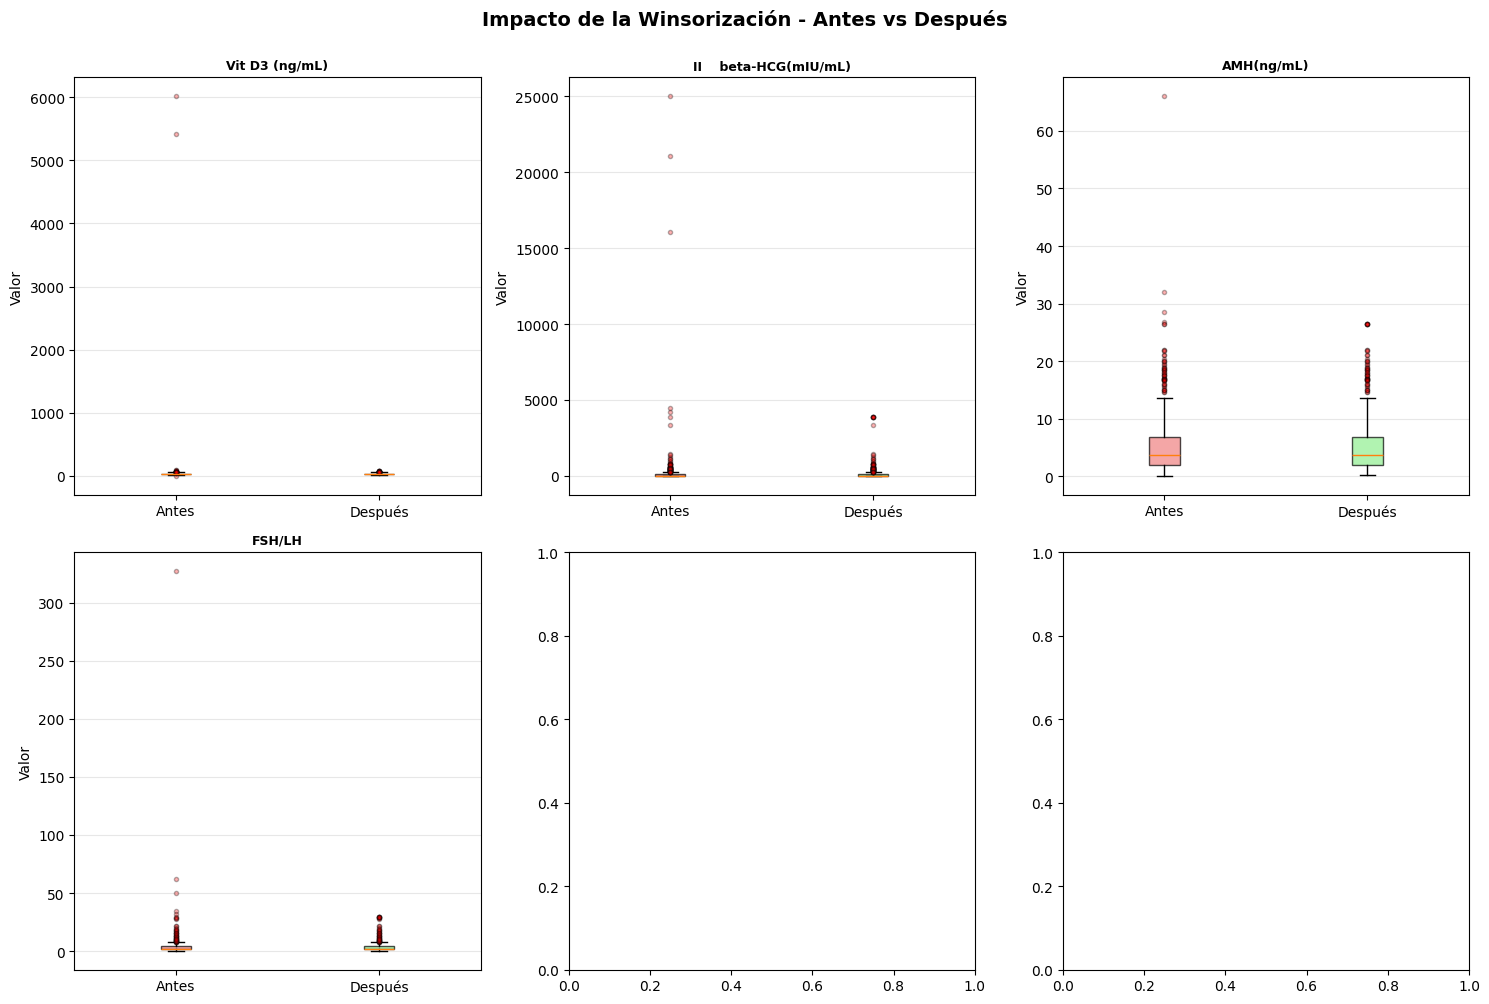


✅ Visualización guardada: winsorization_impact.png

✅ VERIFICACIÓN FINAL

📊 Dataset Winsorizado:
   Filas: 538
   Columnas: 42
   Nulos: 0
   Variables winsorizadas: 4

✅ DATOS LISTOS PARA ANÁLISIS ESTADÍSTICO
   Archivo: PCOS_data_winsorized.csv

🎯 Siguiente paso: Análisis estadístico completo


In [3]:
"""
NOTEBOOK 02: WINSORIZACIÓN DE OUTLIERS MODERADOS
================================================

Objetivo: Reducir impacto de outliers extremos sin eliminar datos
Entrada: PCOS_data_imputed.csv (538 filas)
Salida: PCOS_data_winsorized.csv
"""

# ================================================================
# CELDA 1: Configuración e imports
# ================================================================

import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns

print("="*80)
print("🔄 WINSORIZACIÓN DE OUTLIERS MODERADOS")
print("="*80)

# Cargar datos limpios e imputados
df = pd.read_csv('PCOS_data_imputed.csv')

print(f"\n📊 Dataset cargado:")
print(f"   Filas: {len(df)}")
print(f"   Columnas: {len(df.columns)}")
print(f"   Nulos: {df.isnull().sum().sum()}")

# ================================================================
# CELDA 2: Identificar variables para winsorizar
# ================================================================

print("\n" + "="*80)
print("🔍 IDENTIFICANDO VARIABLES CON OUTLIERS EXTREMOS")
print("="*80)

# Variables numéricas continuas (hormonales y biomarcadores)
vars_to_check = [
    'FSH(mIU/mL)', 
    'LH(mIU/mL)', 
    'TSH (mIU/L)', 
    'AMH(ng/mL)',
    'PRL(ng/mL)',
    'I   beta-HCG(mIU/mL)',
    'II    beta-HCG(mIU/mL)',
    'FSH/LH',
    'BMI',
    'Weight (Kg)',
    'RR (breaths/min)',
    'Hb(g/dl)',
    'Vit D3 (ng/mL)'
]

# Calcular IQR y detectar outliers para cada variable
outlier_stats = []

for var in vars_to_check:
    if var in df.columns:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Contar outliers
        n_outliers = ((df[var] < lower_bound) | (df[var] > upper_bound)).sum()
        pct_outliers = (n_outliers / len(df)) * 100
        
        max_val = df[var].max()
        p99 = df[var].quantile(0.99)
        
        outlier_stats.append({
            'Variable': var,
            'N_Outliers': n_outliers,
            'Pct_Outliers': pct_outliers,
            'Max_Actual': max_val,
            'P99': p99,
            'Reduccion_Max': max_val - p99
        })

# Convertir a DataFrame y ordenar
outlier_df = pd.DataFrame(outlier_stats)
outlier_df = outlier_df.sort_values('N_Outliers', ascending=False)

print(f"\n📊 VARIABLES CON MÁS OUTLIERS:\n")
print(f"{'Variable':<30} {'Outliers':<12} {'% Outliers':<12} {'Max Actual':<12} {'P99':<12}")
print("-"*90)

for _, row in outlier_df.head(15).iterrows():
    print(f"{row['Variable']:<30} {row['N_Outliers']:<12.0f} {row['Pct_Outliers']:<12.1f} {row['Max_Actual']:<12.2f} {row['P99']:<12.2f}")

# Seleccionar variables con >5% de outliers para winsorizar
vars_to_winsorize = outlier_df[outlier_df['Pct_Outliers'] > 5]['Variable'].tolist()

print(f"\n🎯 Variables seleccionadas para winsorización: {len(vars_to_winsorize)}")
print(f"   Criterio: >5% de outliers detectados\n")
for var in vars_to_winsorize:
    print(f"   • {var}")

# ================================================================
# CELDA 3: Aplicar winsorización
# ================================================================

print("\n" + "="*80)
print("🔄 APLICANDO WINSORIZACIÓN (Percentil 1-99)")
print("="*80)

# Crear copia del dataset
df_winsorized = df.copy()

# Log de cambios
winsorization_log = []

print(f"\n{'Variable':<35} {'Max Antes':<15} {'Max Después':<15} {'Cambio':<15}")
print("-"*80)

for var in vars_to_winsorize:
    # Guardar estadísticas antes
    original_max = df[var].max()
    original_min = df[var].min()
    original_mean = df[var].mean()
    original_std = df[var].std()
    
    # Contar outliers antes
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers_before = ((df[var] < lower_bound) | (df[var] > upper_bound)).sum()
    
    # Aplicar winsorización (límites 1% y 99%)
    df_winsorized[var] = winsorize(df[var], limits=(0.01, 0.01))
    
    # Estadísticas después
    new_max = df_winsorized[var].max()
    new_min = df_winsorized[var].min()
    new_mean = df_winsorized[var].mean()
    new_std = df_winsorized[var].std()
    
    # Contar outliers después
    Q1_new = df_winsorized[var].quantile(0.25)
    Q3_new = df_winsorized[var].quantile(0.75)
    IQR_new = Q3_new - Q1_new
    lower_bound_new = Q1_new - 1.5 * IQR_new
    upper_bound_new = Q3_new + 1.5 * IQR_new
    n_outliers_after = ((df_winsorized[var] < lower_bound_new) | (df_winsorized[var] > upper_bound_new)).sum()
    
    # Calcular cambio
    change = ((new_max - original_max) / original_max * 100) if original_max != 0 else 0
    
    print(f"{var:<35} {original_max:>14.2f} {new_max:>14.2f} {change:>13.1f}%")
    
    winsorization_log.append({
        'Variable': var,
        'Mean_Before': original_mean,
        'Mean_After': new_mean,
        'Std_Before': original_std,
        'Std_After': new_std,
        'Max_Before': original_max,
        'Max_After': new_max,
        'Min_Before': original_min,
        'Min_After': new_min,
        'Outliers_Before': n_outliers_before,
        'Outliers_After': n_outliers_after,
        'Reduction_%': ((n_outliers_before - n_outliers_after) / n_outliers_before * 100) if n_outliers_before > 0 else 0
    })

# ================================================================
# CELDA 4: Guardar resultados
# ================================================================

# Guardar log detallado
wins_df = pd.DataFrame(winsorization_log)
wins_df.to_csv('winsorization_log.csv', index=False)
print(f"\n💾 Log guardado: winsorization_log.csv")

# Resumen de impacto
total_outliers_before = wins_df['Outliers_Before'].sum()
total_outliers_after = wins_df['Outliers_After'].sum()
reduction = ((total_outliers_before - total_outliers_after) / total_outliers_before * 100) if total_outliers_before > 0 else 0

print(f"\n" + "="*80)
print(f"📊 RESUMEN DE WINSORIZACIÓN")
print(f"="*80)
print(f"\n   Variables winsorizadas: {len(vars_to_winsorize)}")
print(f"   Outliers extremos antes: {total_outliers_before}")
print(f"   Outliers extremos después: {total_outliers_after}")
print(f"   Reducción: {reduction:.1f}%")

# Guardar dataset winsorizado
df_winsorized.to_csv('PCOS_data_winsorized.csv', index=False)
print(f"\n💾 Dataset winsorizado guardado: PCOS_data_winsorized.csv")

print(f"\n✅ Winsorización completada")
print(f"   📁 Dataset listo para análisis estadístico")

# ================================================================
# CELDA 5: Visualización del impacto (opcional)
# ================================================================

print("\n" + "="*80)
print("📊 GENERANDO VISUALIZACIONES COMPARATIVAS")
print("="*80)

# Seleccionar top 6 variables más afectadas
top_vars = wins_df.nlargest(6, 'Reduction_%')['Variable'].tolist()

if len(top_vars) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, var in enumerate(top_vars):
        if idx < 6:
            ax = axes[idx]
            
            # Boxplot antes y después
            data_to_plot = [df[var], df_winsorized[var]]
            bp = ax.boxplot(data_to_plot, 
                           tick_labels=['Antes', 'Después'],
                           patch_artist=True,
                           showfliers=True,
                           flierprops=dict(marker='o', markerfacecolor='red', markersize=3, alpha=0.3))
            
            # Colorear
            colors = ['lightcoral', 'lightgreen']
            for patch, color in zip(bp['boxes'], colors):
                patch.set_facecolor(color)
                patch.set_alpha(0.7)
            
            ax.set_title(var, fontweight='bold', fontsize=9)
            ax.set_ylabel('Valor')
            ax.grid(axis='y', alpha=0.3)
    
    plt.suptitle('Impacto de la Winsorización - Antes vs Después', fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.savefig('winsorization_impact.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n✅ Visualización guardada: winsorization_impact.png")
else:
    print("\n⚠️ No hay suficientes variables para visualizar")

# ================================================================
# CELDA 6: Verificación final
# ================================================================

print("\n" + "="*80)
print("✅ VERIFICACIÓN FINAL")
print("="*80)

print(f"\n📊 Dataset Winsorizado:")
print(f"   Filas: {len(df_winsorized)}")
print(f"   Columnas: {len(df_winsorized.columns)}")
print(f"   Nulos: {df_winsorized.isnull().sum().sum()}")
print(f"   Variables winsorizadas: {len(vars_to_winsorize)}")

print(f"\n✅ DATOS LISTOS PARA ANÁLISIS ESTADÍSTICO")
print(f"   Archivo: PCOS_data_winsorized.csv")
print(f"\n🎯 Siguiente paso: Análisis estadístico completo")
print("="*80)